In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow
plt.style.use('seaborn')

In [12]:
data = pd.read_csv("fashion-mnist.csv").values
X, y = data[:,1:],data[:,0]

In [21]:
X_train = X.reshape((-1,28,28,1))
y_train = np_utils.to_categorical(y) 

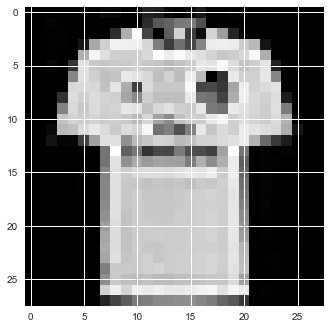

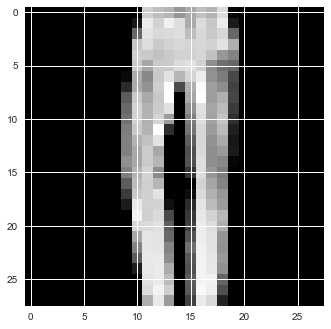

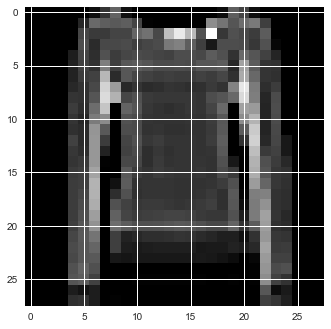

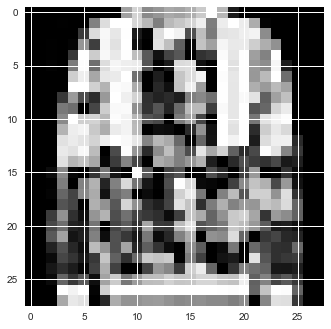

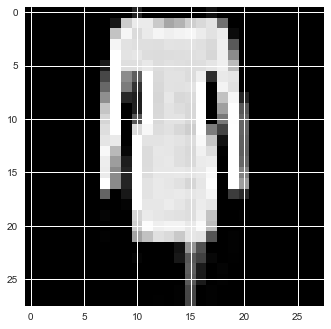

In [23]:
for i in range(5):
    plt.figure(i)
    plt.imshow(X_train[i].reshape(28,28),cmap = "gray")
    plt.show()

In [24]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation="relu"))
model.add(Convolution2D(8,(5,5),activation="relu"))
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [25]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics = ["accuracy"])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 25s 3ms/step - loss: 4.2514 - accuracy: 0.2985 - val_loss: 1.5690 - val_accuracy: 0.4195
Epoch 2/20
8000/8000 [==============================] - 24s 3ms/step - loss: 1.4282 - accuracy: 0.4846 - val_loss: 1.2316 - val_accuracy: 0.5770
Epoch 3/20
8000/8000 [==============================] - 25s 3ms/step - loss: 1.1076 - accuracy: 0.6114 - val_loss: 1.0478 - val_accuracy: 0.6330
Epoch 4/20
8000/8000 [==============================] - 24s 3ms/step - loss: 0.9379 - accuracy: 0.6590 - val_loss: 0.9296 - val_accuracy: 0.6775
Epoch 5/20
8000/8000 [==============================] - 24s 3ms/step - loss: 0.8225 - accuracy: 0.7015 - val_loss: 0.8478 - val_accuracy: 0.7090
Epoch 6/20
8000/8000 [==============================] - 25s 3ms/step - loss: 0.7334 - accuracy: 0.7426 - val_loss: 0.7886 - val_accuracy: 0.7370
Epoch 7/20
8000/8000 [==============================] - 24s 3ms/step - loss: 0.670

In [ ]:
plt.figure(0)
plt.plot(history.history['loss'],'g')
plt.plot(history.history['val_loss'],'b')
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'black')
plt.show()

In [ ]:
loss,accuracy = model.predict(X_train,y_train)
print(accuracy*100)